### Importing required packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
import pickle

### Downloading stopwords package

In [18]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Creating Stemmer Object

In [3]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

### Read Dataset to pandas data frame

In [4]:
yelp = pd.read_csv("dataset.csv",encoding = "ISO-8859-1")

yelp.head()

,Description,Issuetype,IssueCategory,label
0,i have spit problem,spitting,Cleanliness,11
1,i have spit,spitting,Cleanliness,11
2,someone split in theatre,spitting,Cleanliness,11
3,smoking,smoking,Cleanliness,11
4,somebody spit,spitting,Cleanliness,11


In [5]:
yelp.shape
yelp_class = yelp[(yelp.label==11) | (yelp.label==12) | (yelp.label==21) | (yelp.label==22)]

yelp_class.head(5)

,Description,Issuetype,IssueCategory,label
0,i have spit problem,spitting,Cleanliness,11
1,i have spit,spitting,Cleanliness,11
2,someone split in theatre,spitting,Cleanliness,11
3,smoking,smoking,Cleanliness,11
4,somebody spit,spitting,Cleanliness,11


In [6]:
# define X and y
X = yelp.Description
X.apply(lambda x: [item for item in x if item not in stop])

def stem1(text1):
    return ps.stem(text1)

X=X.apply(stem1)
print(X)

0         i have spit problem
1                 i have spit
2     someone split in theatr
3                       smoke
4               somebody spit
               ...           
58         tap water as dirti
59         sewage as overflow
60           sewer as not cov
61             road not clear
62                 road damag
Name: Description, Length: 63, dtype: object


In [7]:
y = yelp_class.label
print(y)
y.shape

0     11
1     11
2     11
3     11
4     11
      ..
58    12
59    12
60    12
61    11
62    22
Name: label, Length: 63, dtype: int64


(63,)

### Spliting dataset into training set and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Tokenize and collect vocabulary

In [9]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
vect.get_feature_names()

['as',
 'borewell',
 'broken',
 'building',
 'chemicals',
 'children',
 'cov',
 'cracks',
 'cutting',
 'damag',
 'dirti',
 'dirtying',
 'dog',
 'electric',
 'encroachment',
 'factori',
 'flyov',
 'footpath',
 'found',
 'from',
 'fumigation',
 'garbag',
 'garbage',
 'garden',
 'hang',
 'have',
 'in',
 'is',
 'leaking',
 'litt',
 'littered',
 'loc',
 'near',
 'not',
 'oil',
 'old',
 'on',
 'overflow',
 'pav',
 'pen',
 'person',
 'pol',
 'poop',
 'potholes',
 'problem',
 'publ',
 'road',
 'sewage',
 'sewer',
 'shaking',
 'smoke',
 'smoking',
 'societi',
 'somebody',
 'someone',
 'spilled',
 'spit',
 'split',
 'structur',
 'swamped',
 'tap',
 'the',
 'theatr',
 'throwing',
 'trees',
 'very',
 'wal',
 'water',
 'wires',
 'with']

### Creating Logisitic Regression Model for dataset 
#### Four Classifier for Identifying the Category and Sentiment 
##### 11 - Cleanliness & Low Importance Issue
##### 12 - Cleanliness & High Importance Issue
##### 21 - Infrastructure & Low Importance Issue
##### 22 - Infrastructure & High Importance Issue

In [10]:
# create a model use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
#Do the prediction
y_pred_class = logreg.predict(X_test_dtm)
#check the model accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.8125


In [11]:
confusion_matrix(y_test, y_pred_class)

array([[9, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 2]])

### Confusion Matrix with test data set

<AxesSubplot:>

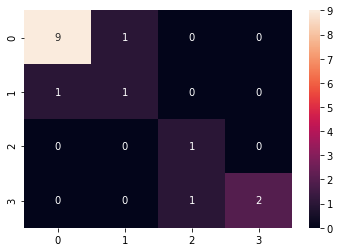

In [12]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_class))
print('\n')
print(classification_report(y_test, y_pred_class))

[[9 1 0 0]
 [1 1 0 0]
 [0 0 1 0]
 [0 0 1 2]]


              precision    recall  f1-score   support

          11       0.90      0.90      0.90        10
          12       0.50      0.50      0.50         2
          21       0.50      1.00      0.67         1
          22       1.00      0.67      0.80         3

    accuracy                           0.81        16
   macro avg       0.72      0.77      0.72        16
weighted avg       0.84      0.81      0.82        16



### Save model to embed into the python web service

In [14]:
# save the model to disk
filename = 'hackathon_model.sav'
pickle.dump(logreg, open(filename, 'wb'))
vec_file = 'vectorizer.pickle'
pickle.dump(vect, open(vec_file, 'wb'))

### ReImporting Model and verifying with sample data

In [15]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
filename = 'hackathon_model.sav'
loaded_model1 = pickle.load(open(filename, 'rb'))
#vect = CountVectorizer()
#self._vectorizer = vect

In [16]:
import numpy as np
data = np.array(['crack on road'])
inputdata = pd.Series(data)
X_test_dtm = vect.transform(inputdata)

In [17]:
loaded_model1.predict(X_test_dtm)

array([21])